In [16]:
import os,glob
import requests 
import base64
import tqdm
import matplotlib.pyplot as plt
import cv2
import re
import sys
import urllib
import json

In [34]:
DATA_DIR='/work/data/vehicle'
# CLASS_NAMES=['car-and-truck','cars_train']
CLASS_NAMES=['cars_train']
label_dir_name='labels'
imagefile_ext='jpg'

In [29]:

# client_id 为官网获取的AK， client_secret 为官网获取的SK
host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=&client_secret='
response = requests.get(host)
access_token = response.json()['access_token']
if response:
    print(response.json()['access_token'])
    

24.dd15e131e8d694da01c87320f0e33347.2592000.1596073905.282335-20658855


In [35]:
# encoding:utf-8
'''
车辆检测
https://aip.baidubce.com/rest/2.0/image-classify/v1/vehicle_detect

应用名称     AppID      API Key                   Secret Key


'''
request_url = "https://aip.baidubce.com/rest/2.0/image-classify/v1/vehicle_detect"
headers = {'content-type': 'application/x-www-form-urlencoded'}
request_url = request_url + "?access_token=" + access_token
# 二进制方式打开图片文件

for class_name in CLASS_NAMES:
    filenames=glob.glob(os.path.join(DATA_DIR,class_name)+f"/*.{imagefile_ext}")
#     print(filenames)
#     break
    for filename in tqdm.tqdm(filenames):
        f_id=filename.strip().split('/')[-1]
        f = open(filename, 'rb')
        img = base64.b64encode(f.read())
        params = {"image":img}
        response = requests.post(request_url, data=params, headers=headers)
#         print(vars(response))
        if response:
            os.makedirs(os.path.join(DATA_DIR,class_name,label_dir_name),exist_ok=True)
            with open(os.path.join(DATA_DIR,class_name,label_dir_name)+f"/{response.status_code}-{f_id.replace(f'{imagefile_ext}','txt')}",'w') as fid:
                fid.write(json.dumps(response.json())+'\n')
#         break
#     break


100%|██████████| 8144/8144 [59:30<00:00,  2.28it/s]  


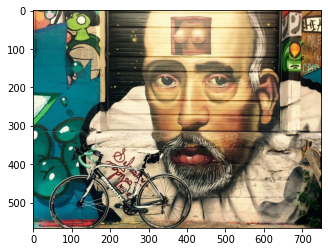

In [15]:
plt.imshow(cv2.imread('baiduimg/bicycle/Baidu_1371.jpeg')[:,:,::-1])